In [1]:
!pip install ipython-autotime
%load_ext autotime

from matplotlib import pyplot as plt
import cProfile
import re
from time import perf_counter

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 6.5 MB/s eta 0:00:00
time: 513 µs (started: 2023-12-01 15:11:08 +00:00)


In [2]:
tests = [
    {
        "matrix": [
            [1, 2, -1, -4, -20],
            [-8, -3, 4, 2, 1],
            [3, 8, 10, 1, 3],
            [-4, -1, 1, 7, -6],
        ],
        "expected_result": 29,
        "subarray_indices": [(1, 1), (3, 3)], #top left and bottom right indices
    },

    {
        "matrix": [[1, 2, 3], [4, 5, 6], [7, 8, 9]],
        "expected_result": 45,
        "subarray_indices": [(0, 0), (2, 2)],
    },
    {
        "matrix": [[-1, -2, -3], [-4, -5, -6], [-7, -8, -9]],
        "expected_result": -1,
        "subarray_indices": [(0, 0), (0, 0)],
    },
    {
        "matrix": [[1, -2, 3], [4, -5, 6], [7, -8, 9]],
        "expected_result": 18,
        "subarray_indices": [(0, 2), (2, 2)],
    },
    {
        "matrix": [[1, 2], [3, 4]],
        "expected_result": 10,
        "subarray_indices": [(0, 0), (1, 1)],
    },
    {
        "matrix": [
            [2, -1, 4, -6, 2],
            [-3, 2, -1, 4, -3],
            [1, -5, 2, -1, 5],
            [4, -2, 3, 7, -2],
        ],
        "expected_result": 14,
        "subarray_indices": [(0, 2), (3, 4)],
    },
    {
        "matrix": [[-2, 5, -1, 4], [8, -6, 3, 1], [2, 2, -4, -1], [-3, 2, 6, -1]],
        "expected_result": 15,
        "subarray_indices": [(0, 0), (3, 3)],
    },
    {
        "matrix": [[1, 2, 3], [4, 5, 6], [7, 8, 9], [10, 11, 12]],
        "expected_result": 78,
        "subarray_indices": [(0, 0), (3, 2)],
    },
    {
        "matrix": [[-1, -2, -3], [-4, -5, -6], [-7, -8, -9], [-10, -11, -12]],
        "expected_result": -1,
        "subarray_indices": [(0, 0), (0, 0)],
    },
    {
        "matrix": [[1, -2, 3], [4, -5, 6], [7, -8, 9]],
        "expected_result": 18,
        "subarray_indices": [(0, 2), (2, 2)],
    },
    {
        "matrix": [[1, 2], [3, 4]],
        "expected_result": 10,
        "subarray_indices": [(0, 0), (1, 1)],
    },
    {
        "matrix": [[1, 2, 3], [4, 5, 6], [7, 8, 9], [10, 11, 12]],
        "expected_result": 78,
        "subarray_indices": [(0, 0), (3, 2)],
    },
    {
        "matrix": [[-1, -2, -3], [-4, -5, -6], [-7, -8, -9], [-10, -11, -12]],
        "expected_result": -1,
        "subarray_indices": [(0, 0), (0, 0)],
    },
    {
        "matrix": [[1, -2, 3],
                   [4, -5, 6],
                   [7, -8, 9]],
        "expected_result": 18,
        "subarray_indices": [(0, 2), (2, 2)],
    },
    {
        "matrix": [[1, 2], [3, 4]],
        "expected_result": 10,
        "subarray_indices": [(0, 0), (1, 1)],
    },
    {
        "matrix": [
            [2, -1, 4, -6, 2],
            [-3, 2, -1, 4, -3],
            [1, -5, 2, -1, 5],
            [4, -2, 3, 7, -2],
        ],
        "expected_result": 14,
        "subarray_indices": [(0, 2), (3, 4)],
    },
    {
        "matrix": [
            [-2, 5, -1, 4],
            [8, -6, 3, 1],
            [2, 2, -4, -1],
            [-3, 2, 6, -1]],
        "expected_result": 15,
        "subarray_indices": [(0, 0), (3, 3)],
    },
    {
        "matrix": [[1, 1],
                   [1, 1], [1, 1], [1, 1]],
        "expected_result": 8,
        "subarray_indices": [(0, 0), (3, 1)],
    },
]


time: 7.43 ms (started: 2023-12-01 15:11:58 +00:00)


In [4]:
import random

def random_fixed_size_submatrix_sum(matrix, K, L, num_iterations=100):
    M, N = len(matrix), len(matrix[0])
    max_sum = float('-inf')
    best_submatrix = None

    for _ in range(num_iterations):
        i1 = random.randint(0, M - K)
        j1 = random.randint(0, N - L)
        i2 = i1 + K - 1
        j2 = j1 + L - 1

        current_sum = sum(matrix[i][j] for i in range(i1, i2 + 1) for j in range(j1, j2 + 1))

        if current_sum > max_sum:
            max_sum = current_sum
            best_submatrix = ((i1, j1), (i2, j2))

    return max_sum, best_submatrix


for i in range(len(tests)):
  matrix = tests[i]
  K, L = 2, 2
  result, best_submatrix = random_fixed_size_submatrix_sum(matrix["matrix"], K, L) # Limiting the iterations to 100
  print("Maximum Sum of Submatrix of Size", K, "x", L, ":", result)
  print("Best Submatrix Coordinates:", best_submatrix)

Maximum Sum of Submatrix of Size 2 x 2 : 19
Best Submatrix Coordinates: ((2, 2), (3, 3))
Maximum Sum of Submatrix of Size 2 x 2 : 28
Best Submatrix Coordinates: ((1, 1), (2, 2))
Maximum Sum of Submatrix of Size 2 x 2 : -12
Best Submatrix Coordinates: ((0, 0), (1, 1))
Maximum Sum of Submatrix of Size 2 x 2 : 2
Best Submatrix Coordinates: ((0, 1), (1, 2))
Maximum Sum of Submatrix of Size 2 x 2 : 10
Best Submatrix Coordinates: ((0, 0), (1, 1))
Maximum Sum of Submatrix of Size 2 x 2 : 11
Best Submatrix Coordinates: ((2, 2), (3, 3))
Maximum Sum of Submatrix of Size 2 x 2 : 7
Best Submatrix Coordinates: ((0, 2), (1, 3))
Maximum Sum of Submatrix of Size 2 x 2 : 40
Best Submatrix Coordinates: ((2, 1), (3, 2))
Maximum Sum of Submatrix of Size 2 x 2 : -12
Best Submatrix Coordinates: ((0, 0), (1, 1))
Maximum Sum of Submatrix of Size 2 x 2 : 2
Best Submatrix Coordinates: ((0, 1), (1, 2))
Maximum Sum of Submatrix of Size 2 x 2 : 10
Best Submatrix Coordinates: ((0, 0), (1, 1))
Maximum Sum of Submatr

In [8]:
count = []
# function to benchmark
def task():

    for i in range(len(tests)):
      matrix = tests[i]
      K, L = 2, 2
      random_fixed_size_submatrix_sum(matrix["matrix"], K, L)

if __name__ == '__main__':
    # run 3 times and record the durations
    times = list()
    for i in range(10):
        count.append(i+1)
        # record start time
        time_start = perf_counter()
        # run the task
        task()
        # calculate the duration
        time_duration = perf_counter() - time_start
        # report the duration
        print(f'>took {time_duration:.3f} seconds')
        # store the duration
        times.append(time_duration)
    # report the average duration
    time_average = sum(times) / 10.0
    print(f'Average time {time_average:.3f} seconds')

>took 0.011 seconds
>took 0.007 seconds
>took 0.006 seconds
>took 0.006 seconds
>took 0.006 seconds
>took 0.007 seconds
>took 0.006 seconds
>took 0.006 seconds
>took 0.006 seconds
>took 0.006 seconds
Average time 0.007 seconds
time: 70.8 ms (started: 2023-12-01 15:14:16 +00:00)


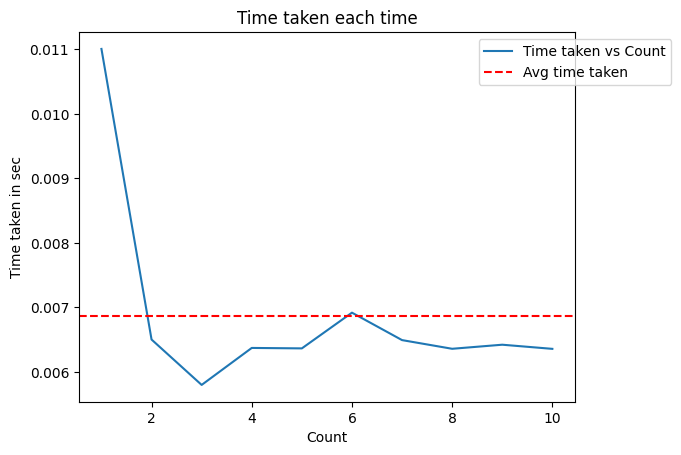

time: 1.26 s (started: 2023-12-01 15:14:22 +00:00)


In [9]:
plt.plot(count,times,label="Time taken vs Count")
plt.axhline(y = time_average, color = 'r', linestyle = '--',label="Avg time taken")
plt.xlabel("Count")
plt.ylabel("Time taken in sec")
plt.title('Time taken each time')
plt.legend(bbox_to_anchor = (1.0, 1), loc = 'upper center')
plt.show()